<a href="https://colab.research.google.com/github/adrien-chinour/ia-data/blob/master/regression_lineaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression linéaire

## Regression simple

### Exercice 1

1. Tracer le nuage de points et estimer le coefficient de corrélation linéaire.
2. Etablir la droite de régression correspondant à ce problème et tracer cette droite.
3. Tester la significativité de la régression au risque 5%.
4. Calculer le coefficient de détermination.
5. Quel serait le chiffre d’affaires mensuel prédit par le modèle pour un budget publicitaire mensuel
de 400 euros ? de 4000 euros ?

In [2]:
import pandas as pa
data = pa.read_csv('http://adrien.chinour.emi.u-bordeaux.fr/datasets/dataset.csv',header=0)
data.head()

,CA,pub
0,220,2.6
1,280,2.6
2,250,2.4
3,170,1.5
4,150,0.9


In [0]:
#On découpe les données en X et en Y:
X = data['CA']
Y = data['pub']

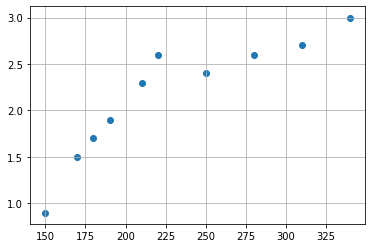

In [0]:
#On peut visualiser les données :
import matplotlib.pyplot as plt
axes = plt.axes()
#On dessine une grille pour une meilleur lecture du graphique :
axes.grid()
#On définit les axes : il s'agit de notre X et de notre Y :
plt.scatter(X,Y)
plt.show()

In [0]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [0]:
# coefficient de corrélation
print('Coef. de corrélation : ', r_value)

Coef. de corrélation :  0.8937577901006998


In [0]:
# modèle de regression
print('modèle de régression : ')
print ('Y = ', slope,' * X + ', intercept)

modèle de régression : 
Y =  0.009138888888888889  * X +  0.058055555555555305


In [0]:
# fonction de prediction des valeurs de X
def predict(x):
    return slope * x + intercept

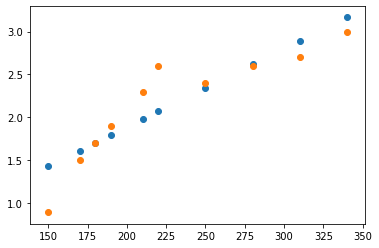

In [0]:
#On prédit à présent les valeurs de X:
fitline = predict(X)
fitline.head()
#Et on dessine le nuage ainsi que la ligne de régression :
plt.scatter(X, fitline)
plt.scatter(X,Y)
#plt.plot(X, fitline, c='r')

plt.show()

### Exercice 2
1. Tracer le nuage de points et estimer le coefficient de corrélation linéaire.
2. Ajuster un modèle linéaire de la forme Y = aX+b+ε : établir la droite de régression correspondant à ce problème et tracer cette droite.
3. Déterminer un intervalle de confiance au risque 5% des paramètres de la droite de régression.
4. Tester la significativité de la régression au risque 5%.
5. Calculer le coefficient de détermination.

In [3]:
data = pa.read_csv('http://adrien.chinour.emi.u-bordeaux.fr/datasets/dataset2.csv',header=0)
data.head()

,temperature,resistance
0,100,46
1,120,48
2,140,49
3,160,51
4,180,52


In [0]:
#On découpe les données en X et en Y:
X = data['temperature']
Y = data['resistance']

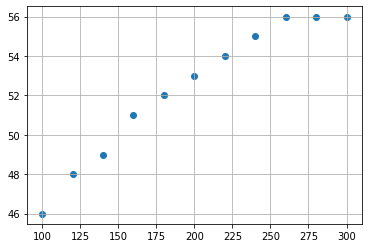

In [5]:
#On peut visualiser les données :
import matplotlib.pyplot as plt
axes = plt.axes()
#On dessine une grille pour une meilleur lecture du graphique :
axes.grid()
#On définit les axes : il s'agit de notre X et de notre Y :
plt.scatter(X,Y)
plt.show()

In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
# coefficient de corrélation
print('Coef. de corrélation : ', r_value)
# modèle de regression
print('modèle de régression : ')
print ('Y = ', slope,' * X + ', intercept, ' + ', std_err)

In [0]:
def predict(x):
    return slope * x + intercept + std_err

In [0]:
#On prédit à présent les valeurs de X:
fitline = predict(X)
fitline.head()
#Et on dessine le nuage ainsi que la ligne de régression :
plt.scatter(X, fitline)
plt.scatter(X,Y)
#plt.plot(X, fitline, c='r')

plt.show()

In [6]:
print ('R² = ', r_value**2, ' p_value = ', p_value)
# p_value < 5%, on rejette alors H0 : la température à une influence sur la résistance.

NameError: ignored

## Regression multiple

### Exercice 1
1. Y a-t-il un lien entre la valeur totale et les différents facteurs ?
2. Afficher les valeurs des différentes statistiques desciptives.
3. Faites les différentes régressions linéaires simples possibles, et choisissez la (ou les) plus pertinente(s).
4. Faites la régression multiple de la Valeur totale en fonction des autres facteurs (quand c’est possible). Analysez les résultats obtenus.

In [0]:
data = pa.read_csv('http://adrien.chinour.emi.u-bordeaux.fr/datasets/proprietes.csv',header=0)
data.head()

In [0]:
Y = data['Valeur Totale']
X = data[['Valeur Terrain', 'Acre', 'Pied2', 'Pièces', 'Chambre', 'SbainsC', 'Sbains', 'Foyers']]

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

In [0]:
print(model.intercept_)

In [0]:
print(model.coef_)

In [0]:
from statsmodels.regression.linear_model import OLS
m = OLS(Y,X)
results = m.fit()
su = results.summary()
print(su)

In [0]:
def predict(x):
    return model.coef_ * x + model.intercept_